# LENDING CLUB CASE STUDY

### Group Members:
    * Sachin Gupta
    * Saibek Varghese Panicker

   ## PROBLEM STATEMENT
   
   ### A consumer finance company which specializes in lending various types of loans to urban customers. When the company receives a loan application, the company must decide for loan approval based on the applicant’s profile. 
   ### Two types of risks are associated with the bank’s decision:
    * If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
    * If the applicant is not likely to repay the loan, i.e., he/she is likely to default, then approving the loan may lead to a financial loss for the company

### Using Exploratory to understand how consumer attributes and loan attributes influence the tendency of default.


### Import necessary packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_row',200)
pd.set_option('display.max_columns',200)


#### Loading the data and checking the shape

In [9]:
data = pd.read_csv('loan.csv')

C:\Users\pansaibe\AppData\Local\Temp/ipykernel_3988/144827106.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan.csv')


In [10]:
data.shape

(39717, 111)

In [11]:
#check sample data for top 5 rows
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,NaN,16-Apr,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


####  To find the mean, std, 25%, 59%, 75% info from describe function

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.000000e+00,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.000000e+00,8.000000e+00


### Checking for null values

In [14]:
# Check null values using average percentage
data.isnull().mean()*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

### Removal of unwanted/null features

#### Remove those columns which contains more than 60% Null values

In [15]:
null_columns = data.isnull().mean()*100
columns = [i for i,v in null_columns.items() if v>60]
data.drop(columns, axis = 1, inplace=True)
#the cols with 60% null values arent essentila for the analysis

#### Desc column is a sentence column which doesnt play much role in the current analysis

### Column drop Criteria:
    1.Columns having std  0 ,which means the data is constant and won't make any impact on dependant variable
    2.Remove those columns having only 1 unique values. i.e; the data is constant throughout the column
    3.highly biased towards one category in the target column
    4.Highly biased towards zero
    5.Text data/masked data
    6. Columns that doesnt add much value to the analysis

In [16]:
# These columns having std is 0 means the data is constant and won't make any impact on dependant variable
columns1 = ['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med']
data.drop(columns1, axis = 1, inplace = True)

# Remove those columns having the unique values or only 1 category is present
columns2 = ['title', 'id', 'member_id', 'url', 'initial_list_status', 'emp_title', 'pymnt_plan', 'application_type']
data.drop(columns2, axis = 1, inplace = True)

# Remove this column bcoz our most data is lying on 1 category, due to which our data is mostly towards at 1 category
data.drop('pub_rec_bankruptcies', axis = 1, inplace = True)

#desc is a sentence columns
data.drop('desc', axis = 1, inplace=True)

#highly biased towards one category in the target column
columns3 = ['recoveries', 'collection_recovery_fee', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee']
data.drop(columns3, axis = 1, inplace = True)

# delinq_2yrs and pub_rec (mostly skewed at zero)
# zip_code is masked
column4 = ['zip_code', 'delinq_2yrs', 'pub_rec']
data.drop(column4, axis = 1, inplace = True)

# Since these columns won't give us the right essence for our target variable, going to remove
columns = ['last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'earliest_cr_line']
data.drop(columns, axis = 1, inplace = True)

In [17]:
data.shape

(39717, 26)

### Missing value treatment
    numerical cols: can be filled with median/mean
    categorical cols: filled with mode

In [18]:
data.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
inq_last_6mths            0
open_acc                  0
revol_bal                 0
revol_util               50
total_acc                 0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
total_rec_int             0
dtype: int64

In [19]:
# Fill the emp_length with mode, as this is the categorical column
data['emp_length'] = np.where(data['emp_length'].isna(), data['emp_length'].mode(), data['emp_length'])


In [20]:
# removing % for revol util to be treated as numerical feature
data['revol_util'] = data['revol_util'].apply(lambda x : str(x).replace('%', ''))
data['revol_util'] = data['revol_util'].astype(float)

In [21]:
# outlier is not present that's why mean is being used for filling the missing values
data['revol_util'] = np.where(data['revol_util'].isna(), data['revol_util'].mean(), data['revol_util'])

In [22]:
data.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
inq_last_6mths         0
open_acc               0
revol_bal              0
revol_util             0
total_acc              0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
dtype: int64

In [23]:
# Change column datatype of interest reate from object to numerical
data['int_rate'] = data['int_rate'].apply(lambda x : str(x).replace('%', ''))
data['int_rate'] = data['int_rate'].astype(float)

In [24]:
data.shape

(39717, 26)

### Outlier Treatment

In [25]:
# sweetviz for univariate

### Plotting the outliers using boxplot

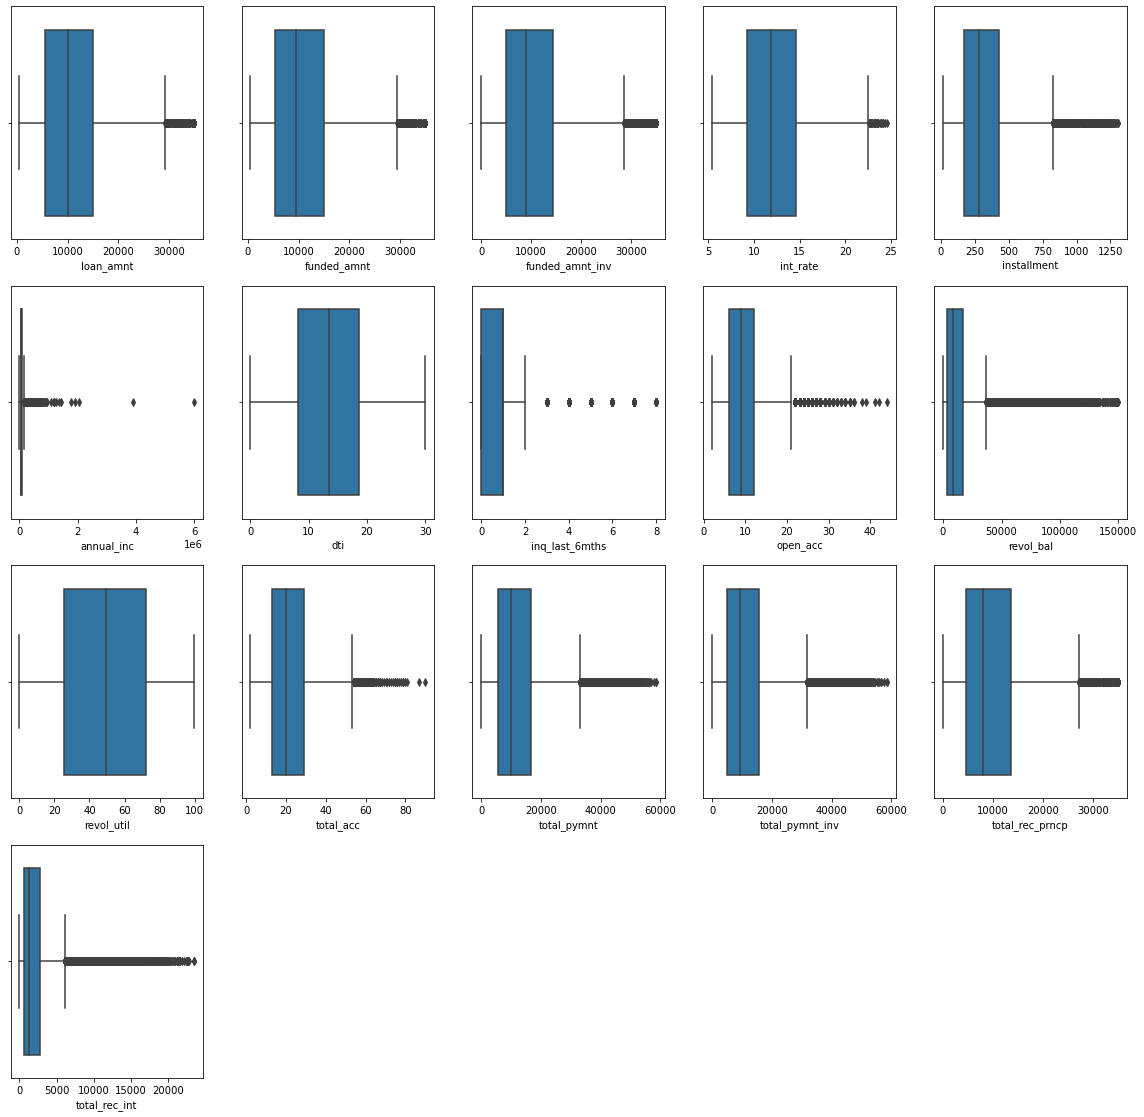

In [26]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in data.select_dtypes(include='number'):
    if plotnumber<=29 :     # as there are 9 columns in the data
        ax = plt.subplot(6,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

### It is obeserved that majority of the columns have outliers. In this analysis as for some columns due to exessive outliers only the outliers beyond 95 percentile is removed.

In [27]:
data['annual_inc'].quantile(0.95)

142000.0

In [28]:
# Above 95% lot of redundant data we have
data = data[data['annual_inc'] <= data['annual_inc'].quantile(0.95)]

In [29]:
data.shape

(37743, 26)

[]

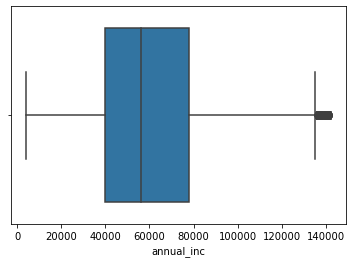

In [30]:
sns.boxplot(data['annual_inc'])
plt.plot()

In [31]:
# Above 95% lot of redundant data we have
data = data[data['revol_bal'] <= data['revol_bal'].quantile(0.95)]

[]

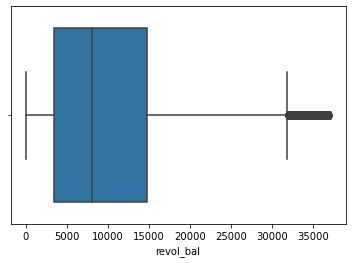

In [32]:
sns.boxplot(data['revol_bal'])
plt.plot()

In [33]:
data.shape

(35855, 26)

In [34]:
# Above 95% lot of redundant data we have
data = data[data['inq_last_6mths'] <= data['inq_last_6mths'].quantile(0.95)]

In [35]:
data.shape

(35350, 26)

[]

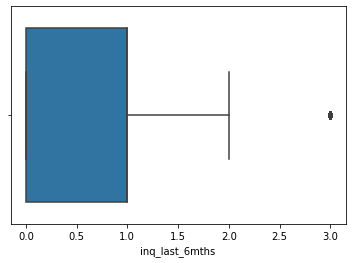

In [36]:
sns.boxplot(data['inq_last_6mths'])
plt.plot()

In [37]:
# Above 95% lot of redundant data we have
data = data[data['open_acc'] <= data['open_acc'].quantile(0.96)]

[]

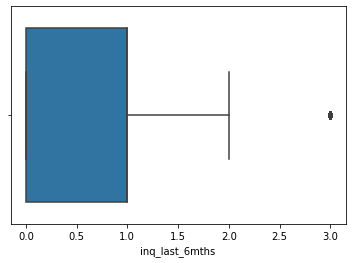

In [38]:
sns.boxplot(data['inq_last_6mths'])
plt.plot()

In [39]:
data.shape

(34233, 26)

<AxesSubplot:xlabel='total_rec_int'>

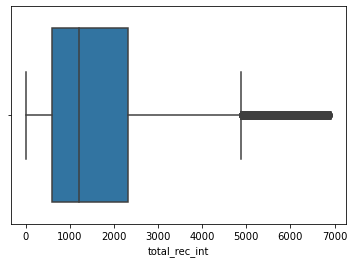

In [40]:
# Above 95% lot of redundant data we have
data = data[data['total_rec_int'] <= data['total_rec_int'].quantile(0.95)]
sns.boxplot(data['total_rec_int'])

In [41]:
data.shape

(32521, 26)

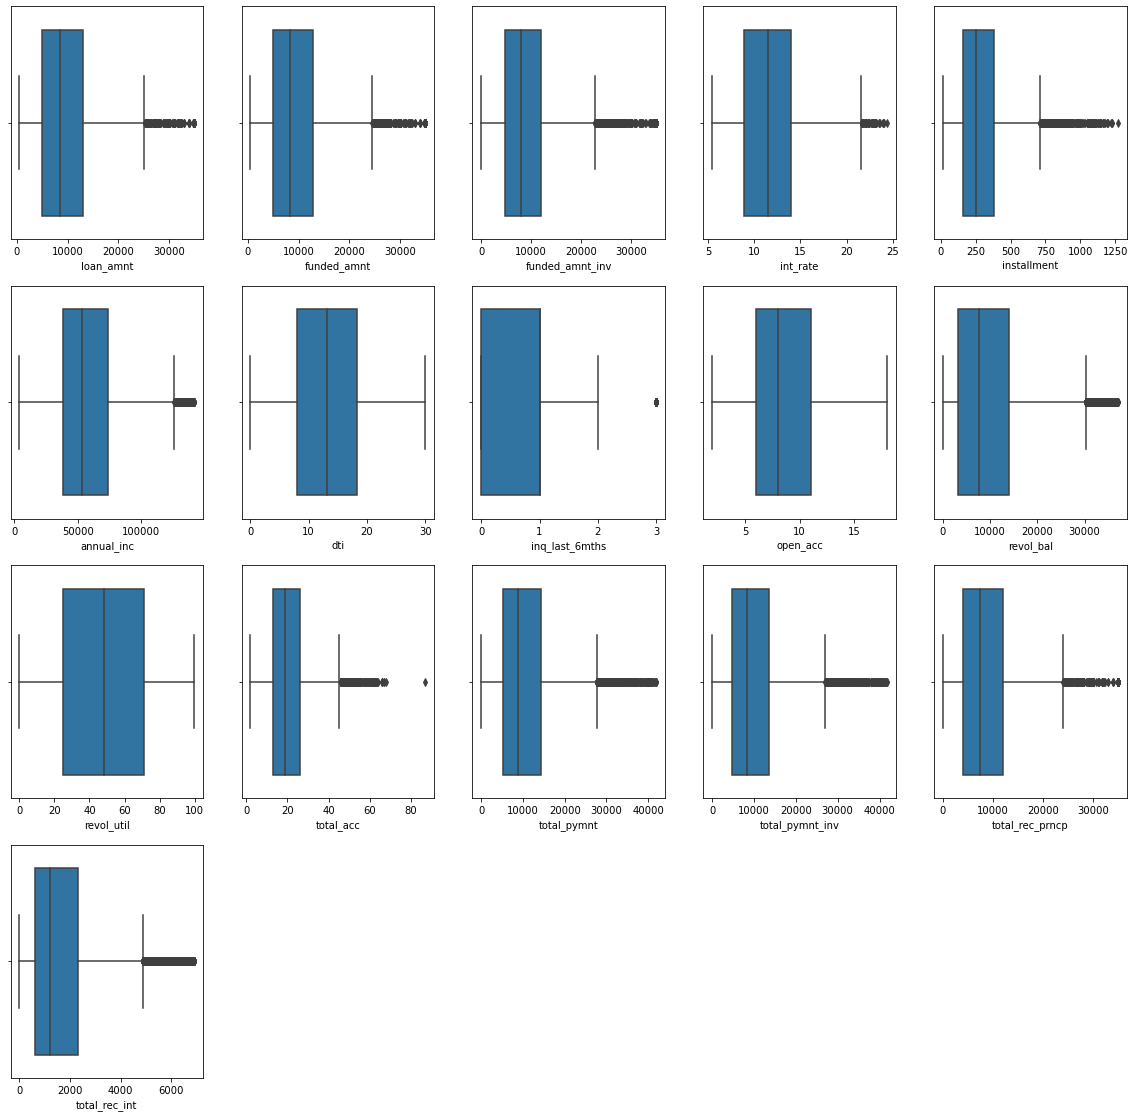

In [42]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in data.select_dtypes(include='number'):
    if plotnumber<=29 :     # as there are 9 columns in the data
        ax = plt.subplot(6,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

In [43]:
data.shape

(32521, 26)

#### Derived Metrics- issue_d : the date column is converted to months and years


In [44]:
data['issue_year'] = data.issue_d.apply(lambda x:x.split('-')[0])
data['issue__year']=data['issue_year'].astype(float)
data['issue_month']=data.issue_d.apply(lambda x:x.split('-')[1])
#data['issue_month']

In [45]:
# issue_d is not necessary now
data.drop('issue_d', axis = 1, inplace = True)

In [46]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,issue_year,issue__year,issue_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,1,3,13648,83.7,9,5863.155187,5833.84,5000.00,863.16,11,11.0,Dec
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,2,2,2956,98.5,10,3005.666844,3005.67,2400.00,605.67,11,11.0,Dec
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,1,10,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,11,11.0,Dec
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,OR,17.94,0,15,27783,53.9,38,3513.330000,3513.33,2475.94,1037.39,11,11.0,Dec
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,3,9,7963,28.3,12,5632.210000,5632.21,5000.00,632.21,11,11.0,Dec


In [47]:
data.shape

(32521, 28)

### Initialising the target variable
    * Loan status is the target variable.
    * There are 3 categories present in loan status : Fully paid, Charged off and current, where Fully paid is the creditors and charged off are the defaulters.
    * Current are the ones where the loan period is currently running and it isn't essential for this analysis
    

In [48]:

data['loan_status'].value_counts()

Fully Paid     27333
Charged Off     4636
Current          552
Name: loan_status, dtype: int64

In [49]:
# removing current one bcoz it doesn't being completed
data = data[~(data['loan_status'] == 'Current')]

In [50]:
data['loan_status'].value_counts(normalize=True)

Fully Paid     0.854985
Charged Off    0.145015
Name: loan_status, dtype: float64

### There are 15% defaulters

#### Converting the target columns to 1 an 0 :
    * 1 : Fully Paid
    * 0  : Charged Off

In [51]:
data.loan_status = data.loan_status.apply(lambda x:1 if x=='Fully Paid' else 0)

In [52]:
data['loan_status'].value_counts()

1    27333
0     4636
Name: loan_status, dtype: int64

In [53]:
data.shape

(31969, 28)

## Univariate Analysis

### Analysis for Numerical Columns


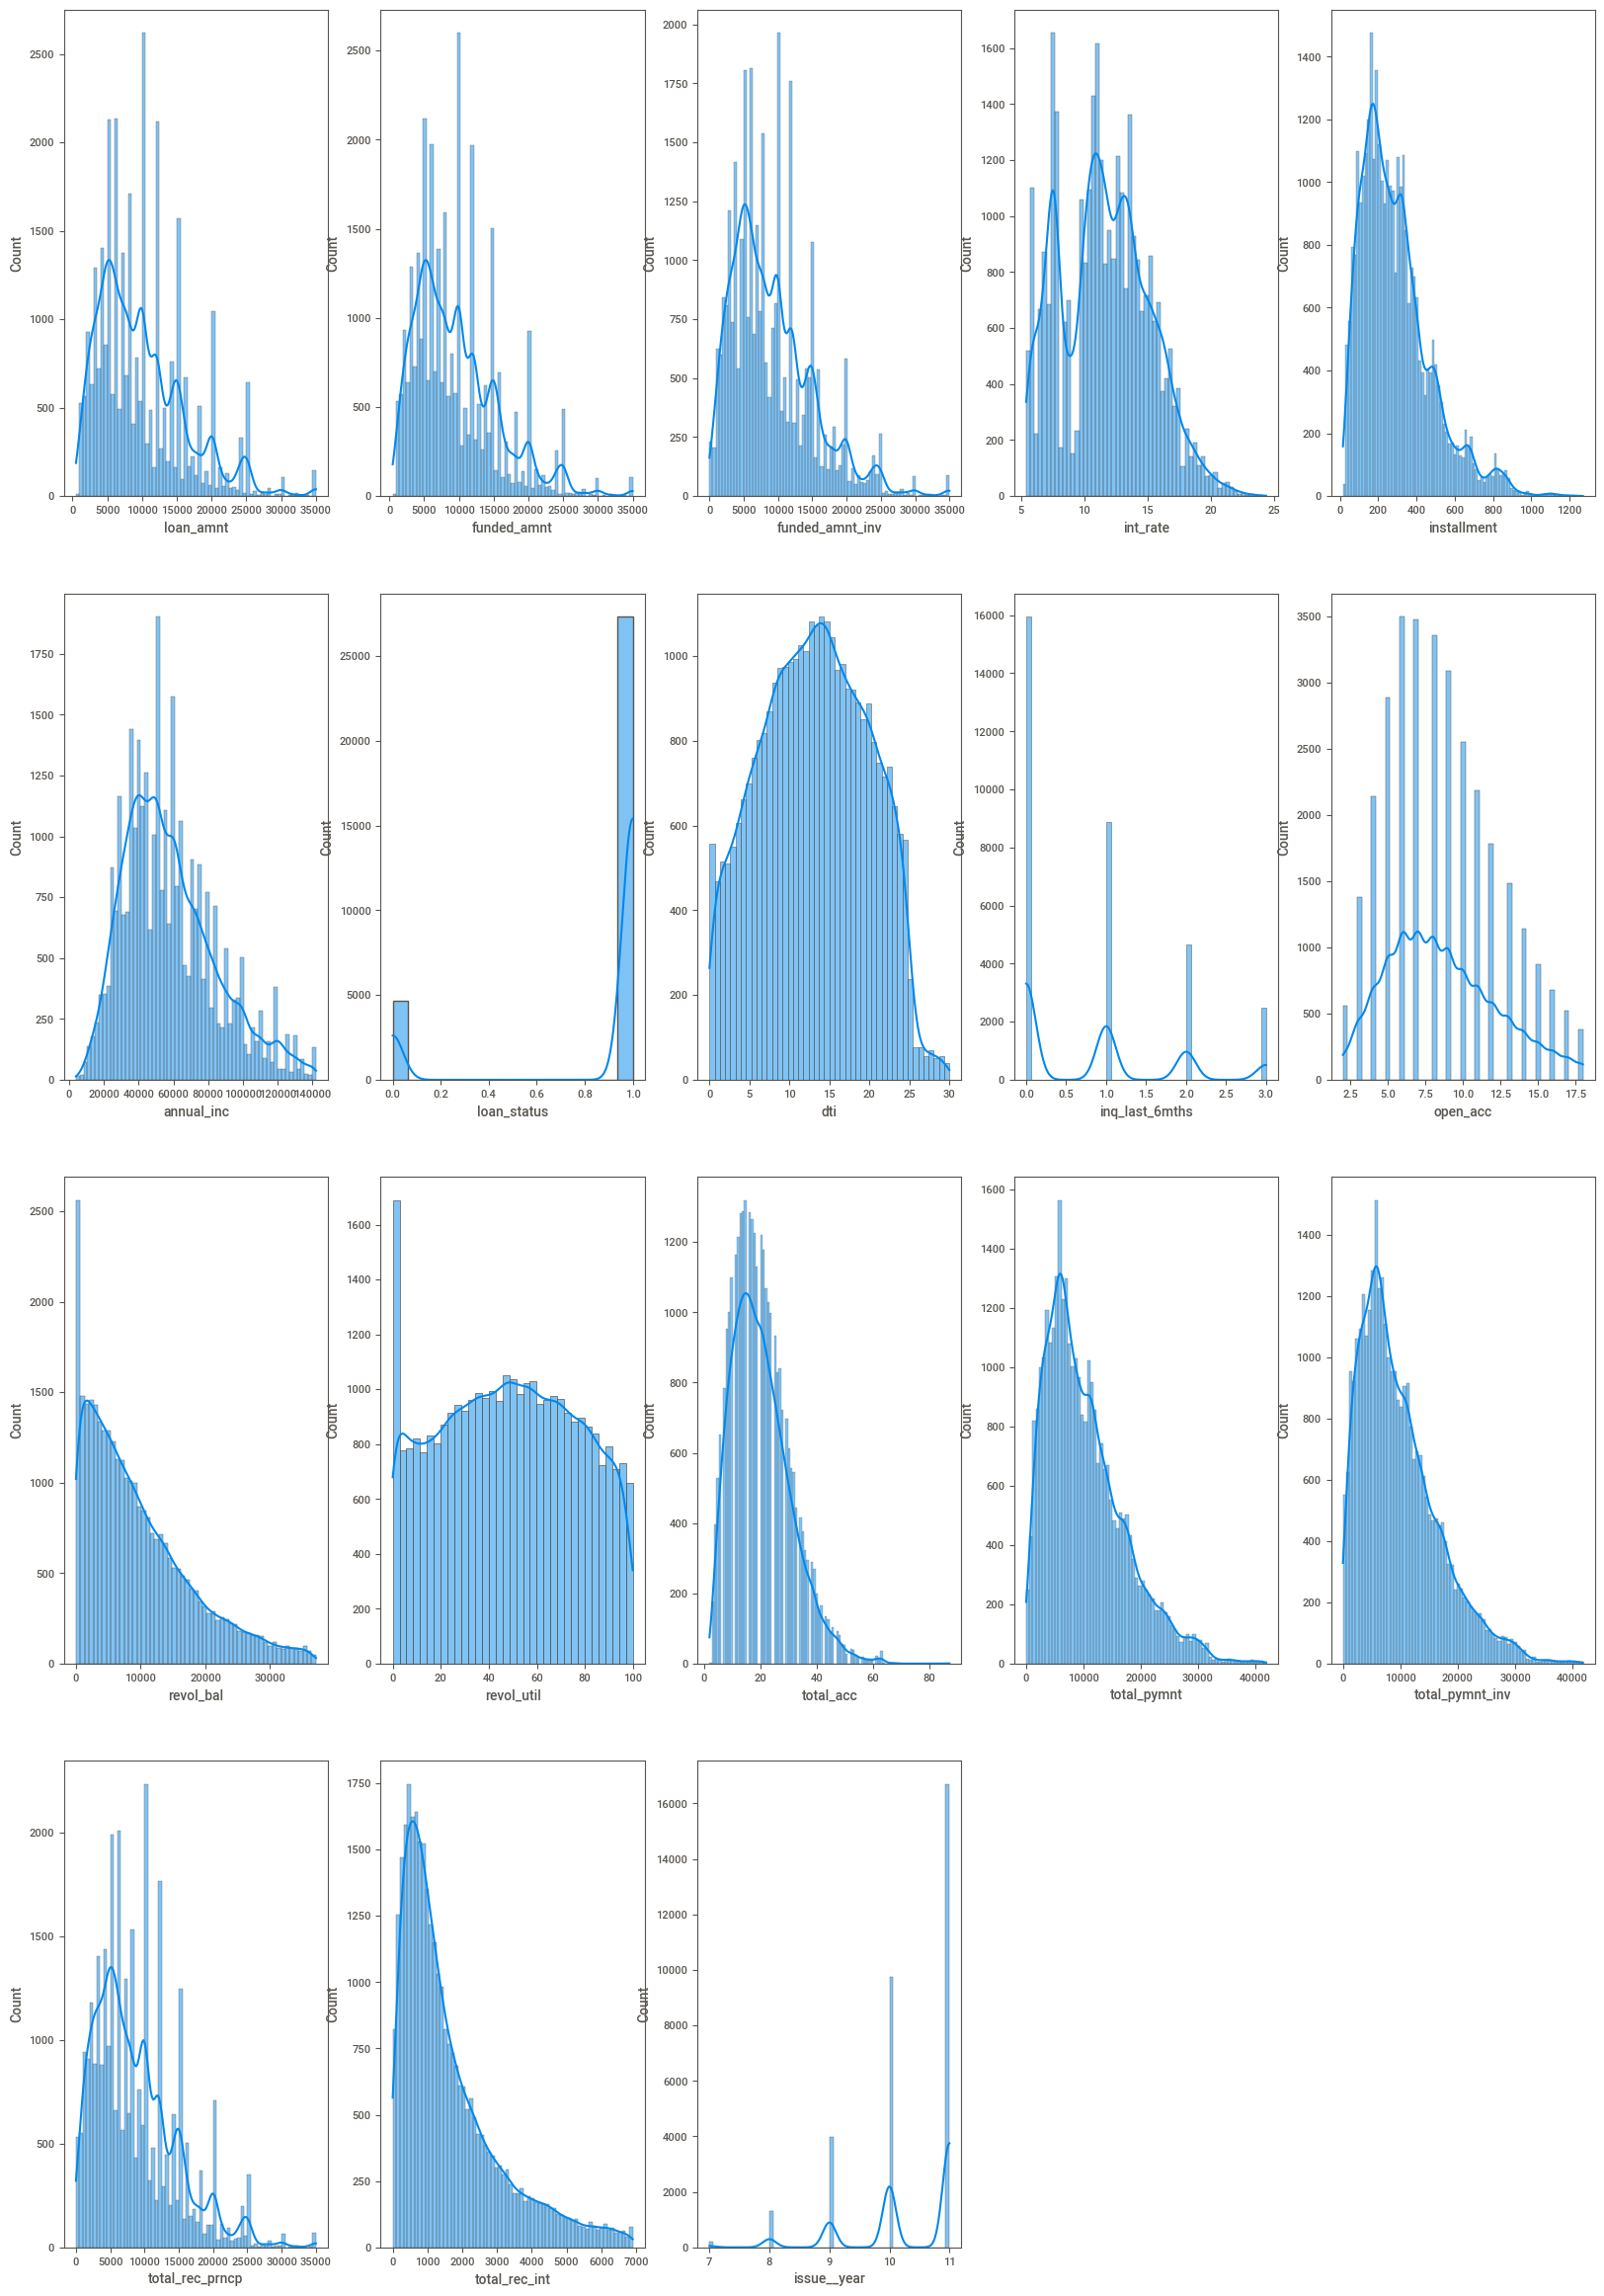

In [59]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in data.select_dtypes(include='number'):
    if plotnumber<=29 :     
        ax = plt.subplot(4,5,plotnumber)
        sns.histplot(data[column], kde = True)
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

### Numerical columns
    1. loan_amnt : Most of the loan_amnt has been taken upto 10,000
    2. From the observed plot we can say that funded_amnt, funded_amnt_inv is same as loan_amnt 
    3. int_rate : Most of the interest rate for the loan given lies between 10-15%
    4. installment : Most of the installment lies in the range of 250 (Somewhat around Median)
    5. annual_inc : looks like a normal distribution curve (Majoity of the income lies between 35k - 60k)
    6. dti : It's a purely Normal Distribution Graph (Maximum Data lies in it's median/mean)
    7. inq_last_6_months : Most people not inquired in the last 6 months (approx : 50%)
    8. open_acc : Most of the people open credit lines lies between 5-10
    9. total_acc : Most of the peple having total credit lines lies between 15-25
    10.issue_year : As the years goes on the no. of people taking loans exponentially increases.
    11.loan_status : Most of the people pay their loan (approx : 85%) and rest are the defaulters.


### Analysis of categorical columns

In [60]:
# it was found home_ownership feature has few values as NONE , so converting them to others.
data['home_ownership'] = np.where(data['home_ownership'] == 'NONE', 'OTHER', data['home_ownership'])

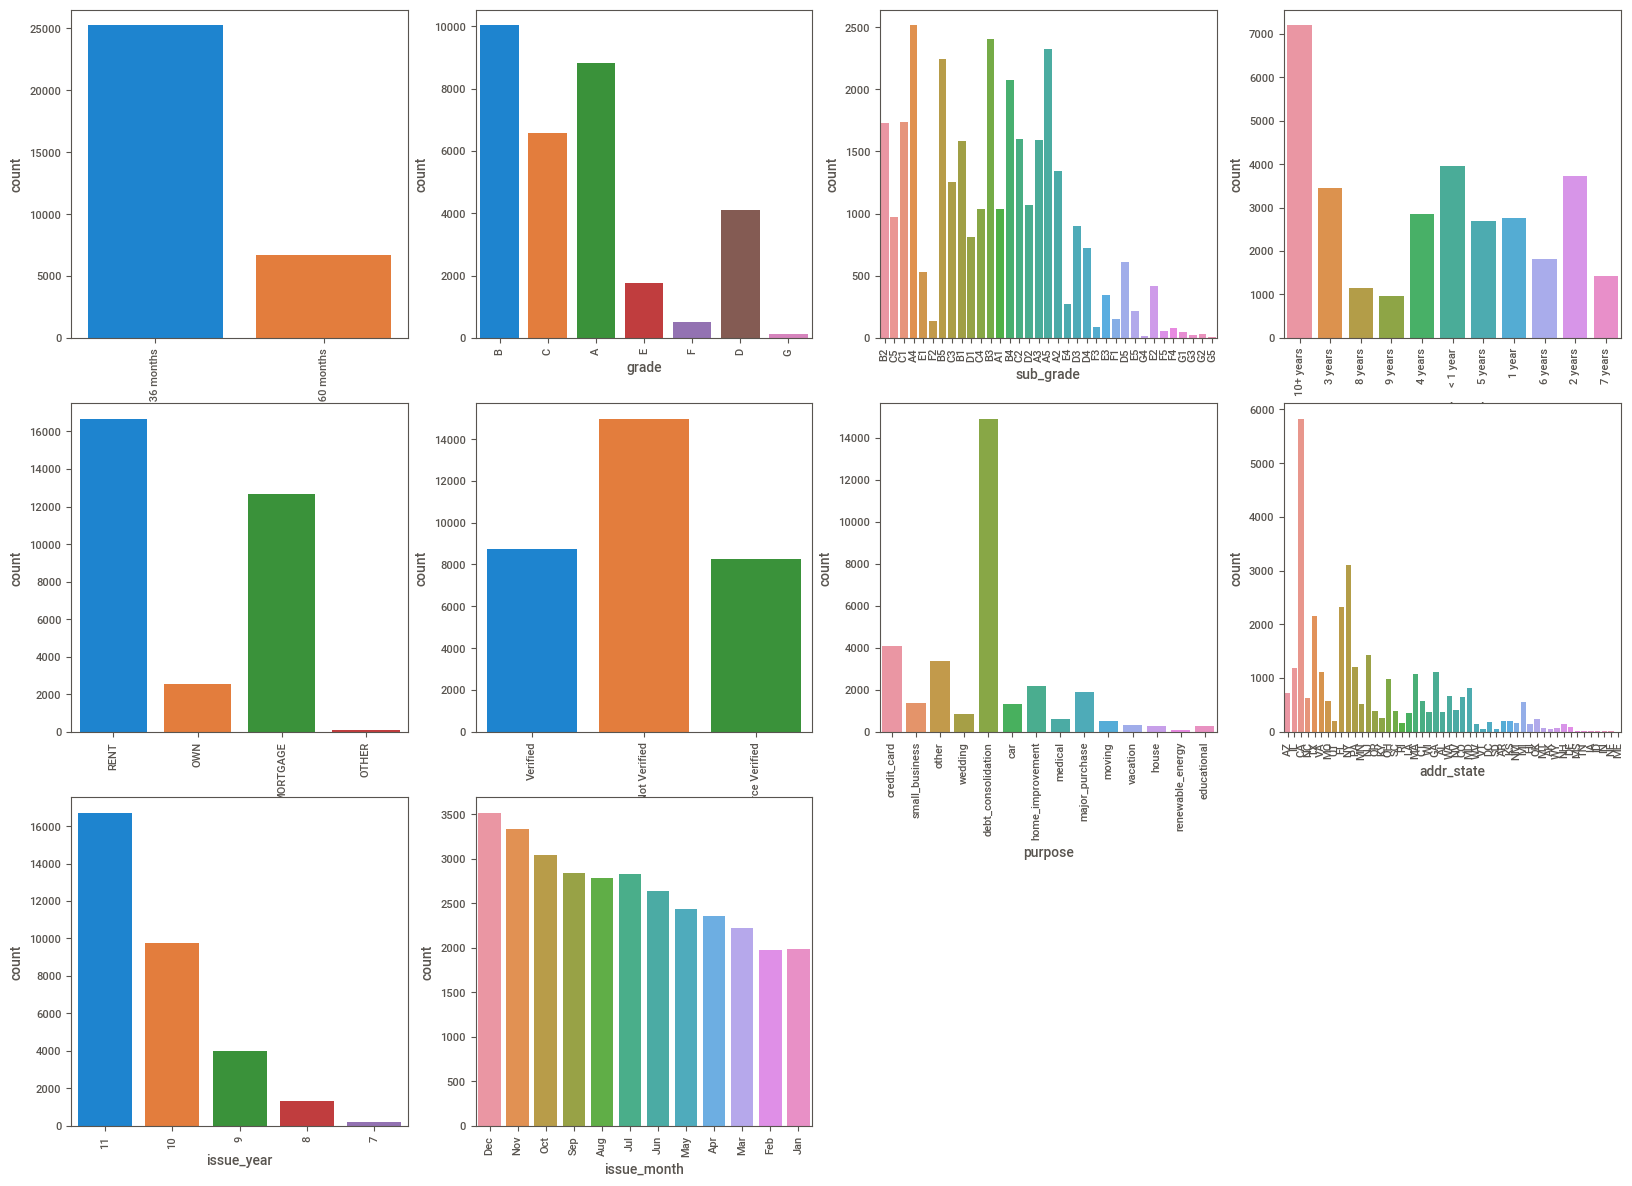

In [62]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in data.select_dtypes(exclude='number'):
    if plotnumber<=29 :     # as there are 9 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(data[column])
        plt.xlabel(column,fontsize=10)
        plt.xticks(rotation = 90)
        
    plotnumber+=1
plt.show()

### Categorical Columns
    1. term : 36 Months is the most frequent time period.
    2. grade : A and B are the most frequently occuring loan grade.
    3. emp_length : 10+ Years is the most frquent one.
    4. home_ownership : Max people Took loan who belongs to RENT Category.
    5. verification_status : Maximum people are not_verified status.
    6. purpose : Majority of the reason of took the loan is debt_consolidation.
    7.issue_month : Observed that at the end of the year most people takes loan bcoz they will give some offer etc. to the customer etc.

## Bivariate analysis


### Corelation plot

<AxesSubplot:>

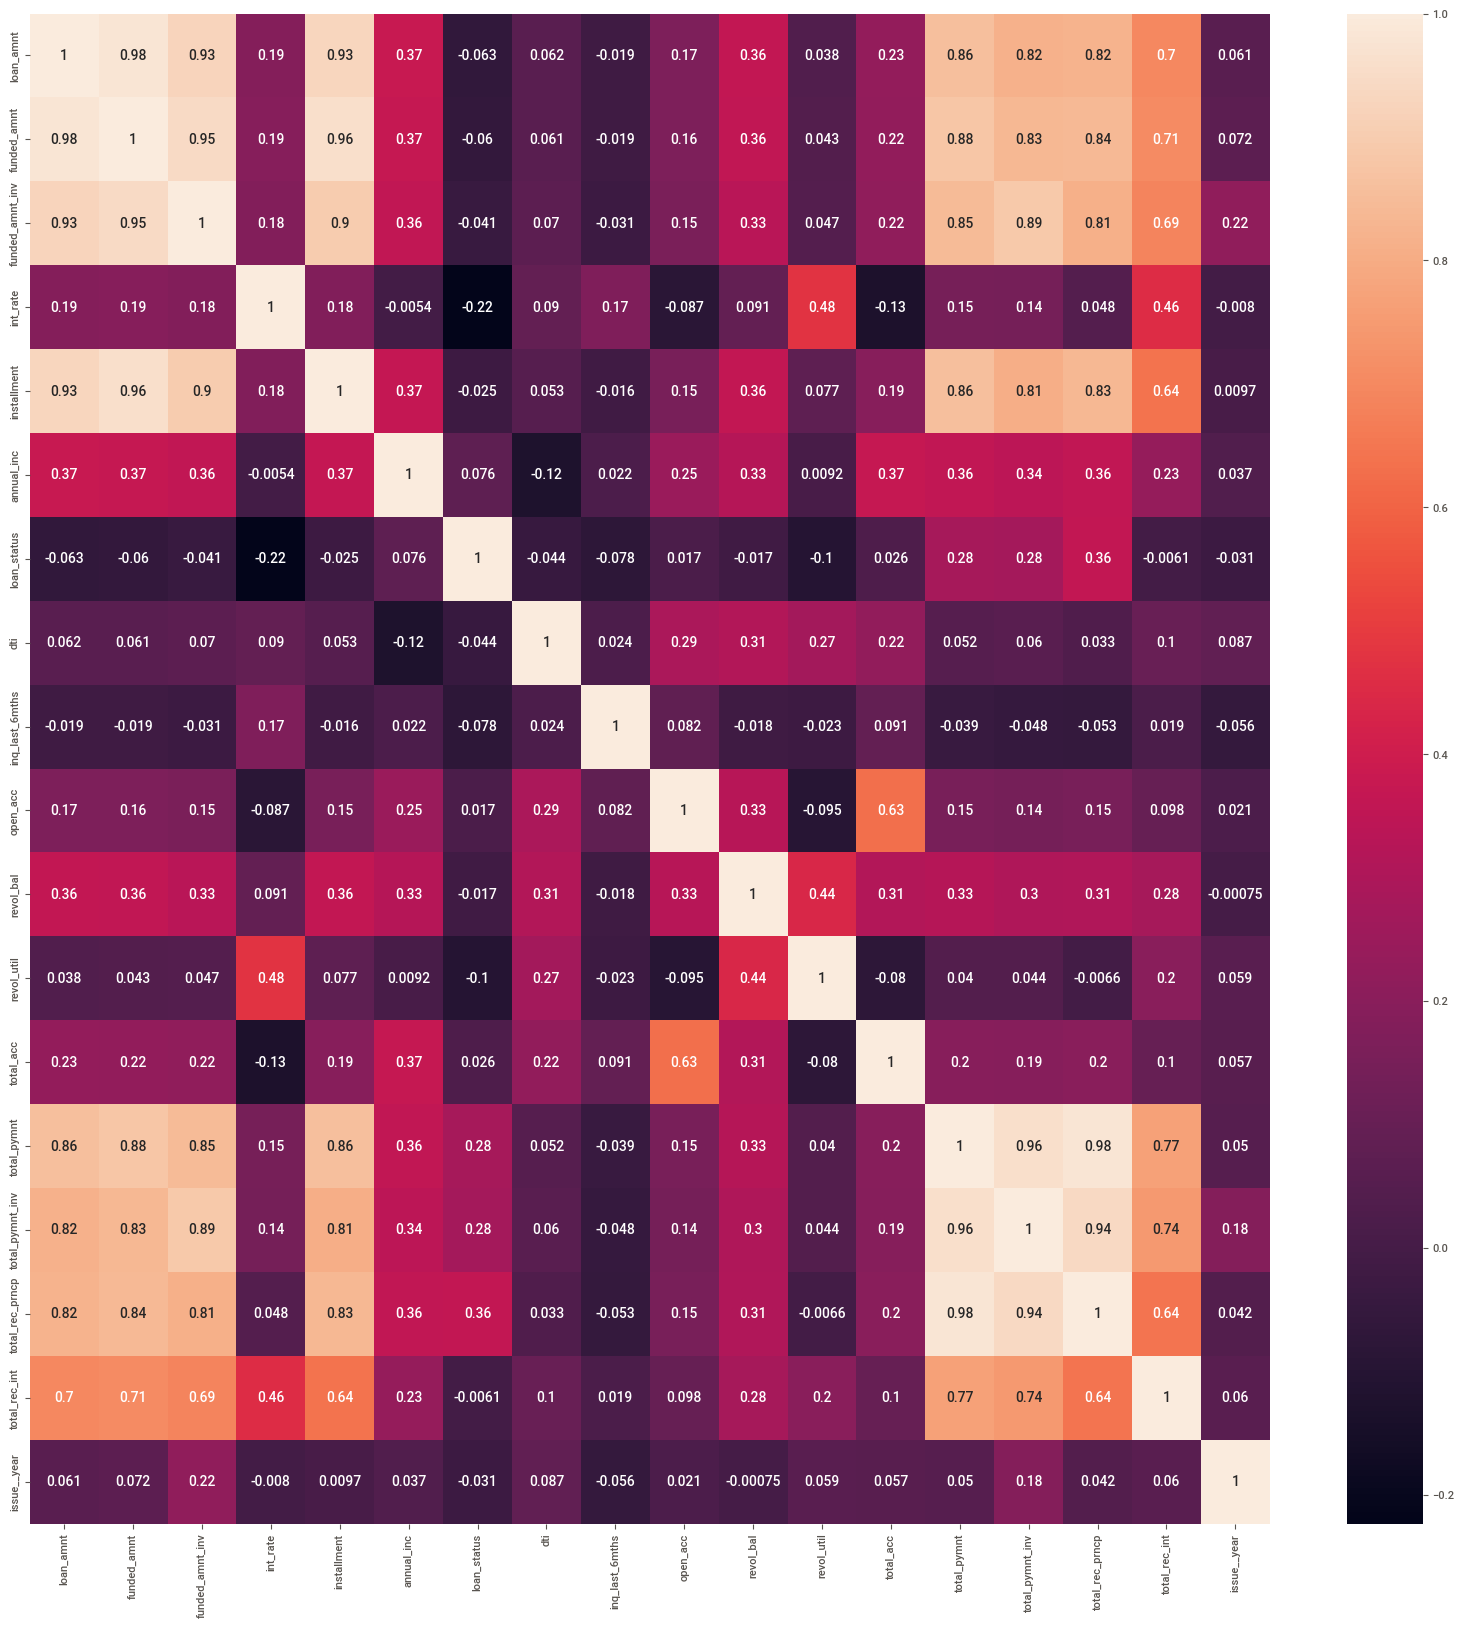

In [63]:
# Create heatmap to findout the correlation
fig = plt.figure()

fig.set_figheight(20)
fig.set_figwidth(20)
x = data.corr()
sns.heatmap(x, annot = True)

### Observed from Correlation matrix:
    - Loan amount is highly correlated with funded_amnt, funded_amnt_inv and installment
    - total_pymnt is highy correlated with total_pymnt_inv and total_rec_prncp

### Few numerical variables are bucketed for analysis purpose

In [64]:
a = data.select_dtypes(include='number')

In [65]:
a.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'loan_status', 'dti', 'inq_last_6mths',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'issue__year'],
      dtype='object')

In [66]:
bins1=[0,10000,20000,30000,100000]
group_names1=['0-10k','10k-20k','20k-30k', '30k+']
data['loan_amnt_bucket']=pd.cut(data['loan_amnt'],bins1,labels=group_names1)

In [67]:
bins1=[0,5,10,15,20,230]
group_names1=['0-5%','5%-10%', '10%-15%', '15%-20%', '20%+']
data['int_rate_bucket']=pd.cut(data['int_rate'],bins1,labels=group_names1)

In [68]:
bins1=[0,25000,50000,75000,100000, 45000000]
group_names1=['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k+']
data['annual_inc_bucket']=pd.cut(data['annual_inc'],bins1,labels=group_names1)

In [69]:
bins1=[0,10,20,30]
group_names1=['0-10','10-20', '20-30']
data['dti_bucket']=pd.cut(data['dti'],bins1,labels=group_names1)

In [70]:
bins1=[0,10000,20000,30000,45000000]
group_names1=['0-10k', '10k-20k', '20k-30k','30k+']
data['total_pymnt_bucket']=pd.cut(data['total_pymnt'],bins1,labels=group_names1)

In [71]:
bins1=[0,2000,4000,6000,45000]
group_names1=['0-2k', '2k-4k', '4k-6k','6k+']
data['total_rec_int_bucket']=pd.cut(data['total_rec_int'],bins1,labels=group_names1)

In [72]:
bucket_list = ['loan_amnt_bucket', 'int_rate_bucket', 'annual_inc_bucket', 'dti_bucket', 'total_pymnt_bucket', 'total_rec_int_bucket']

#### plottig the bucketed variables

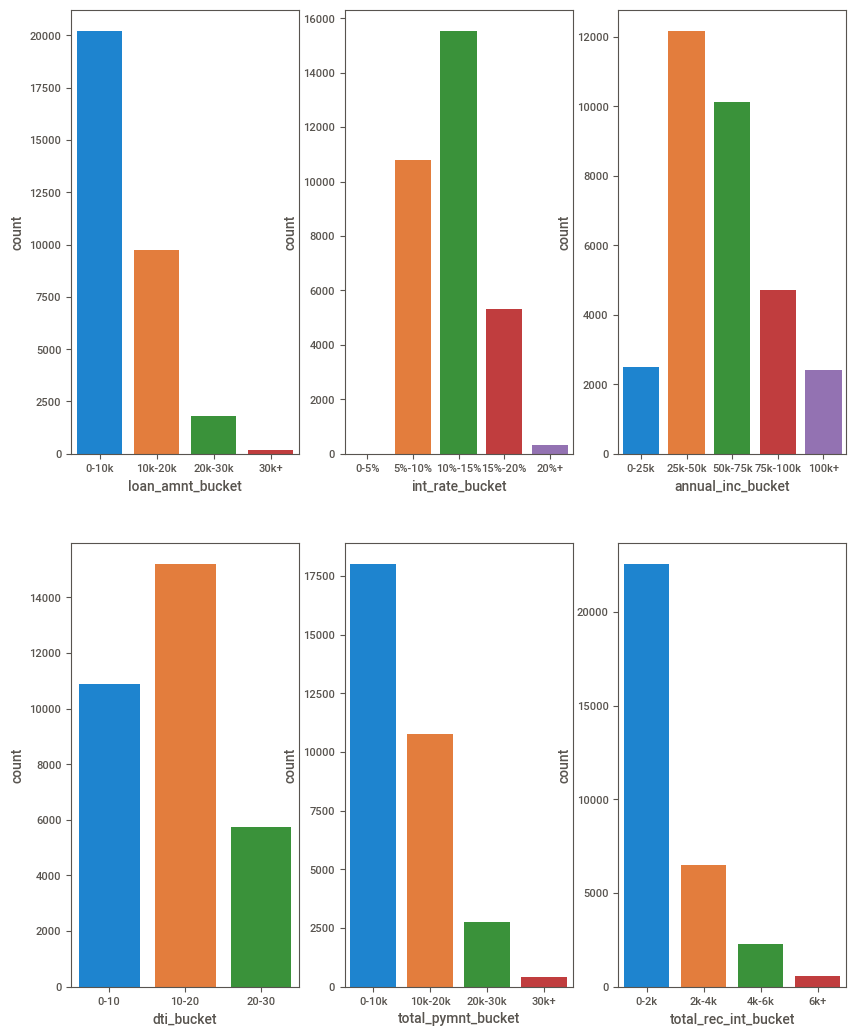

In [73]:
plt.figure(figsize=(10,20), facecolor='white')
plotnumber = 1

for column in data[bucket_list]:
    if plotnumber<=29 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(data[column])
        plt.xlabel(column,fontsize=10)
        # plt.xticks(rotation = 90)
        
    plotnumber+=1
plt.show()

## Observation:
    ----------- Maximum Buckets -------------
        - loan_amnt_bucket : 0-10k
        - int_rate_bucket : 10%-15%
        - annual_inc_bucket : 25k-50k
        - dti_bucket : 10-20
        - total_pymnt_bucket : 0-10k
        - total_rec_int_bucket : 0-2k

In [74]:
data.select_dtypes(exclude='number').columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'issue_year',
       'issue_month', 'loan_amnt_bucket', 'int_rate_bucket',
       'annual_inc_bucket', 'dti_bucket', 'total_pymnt_bucket',
       'total_rec_int_bucket'],
      dtype='object')

### Bivariate Categorical-numerical

In [75]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'issue_year', 'issue__year',
       'issue_month', 'loan_amnt_bucket', 'int_rate_bucket',
       'annual_inc_bucket', 'dti_bucket', 'total_pymnt_bucket',
       'total_rec_int_bucket'],
      dtype='object')

<AxesSubplot:xlabel='int_rate_bucket', ylabel='loan_amnt'>

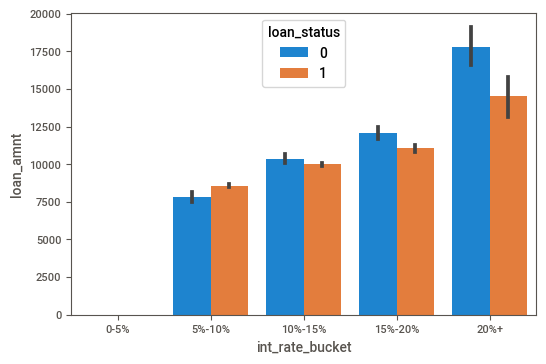

In [76]:
sns.barplot(x = data['int_rate_bucket'], y = data.loan_amnt, hue = data.loan_status)

<AxesSubplot:xlabel='annual_inc_bucket', ylabel='loan_amnt'>

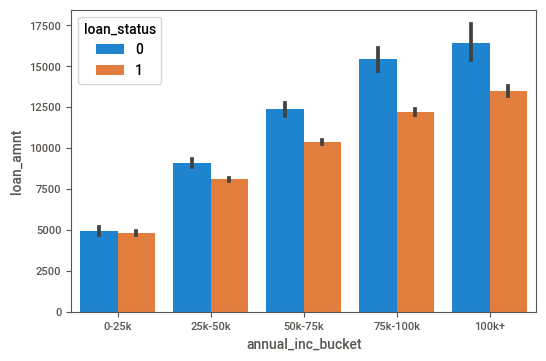

In [77]:
sns.barplot(x = data['annual_inc_bucket'], y = data.loan_amnt, hue = data.loan_status)

<AxesSubplot:xlabel='loan_amnt_bucket', ylabel='annual_inc'>

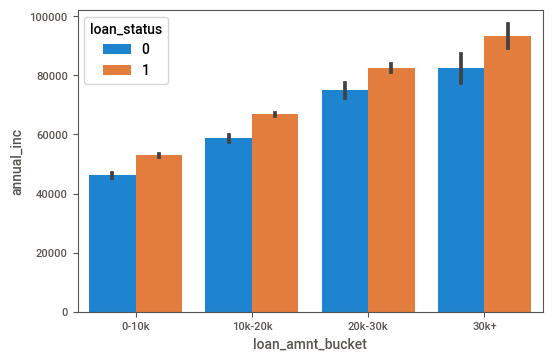

In [78]:
sns.barplot(x = data['loan_amnt_bucket'], y = data.annual_inc, hue = data.loan_status)

<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

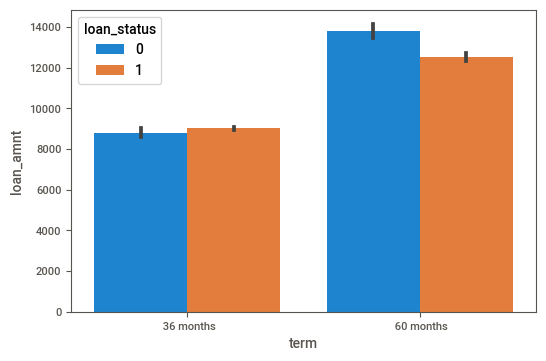

In [79]:
sns.barplot(x = data['term'], y = data.loan_amnt, hue = data.loan_status)

<AxesSubplot:xlabel='emp_length', ylabel='annual_inc'>

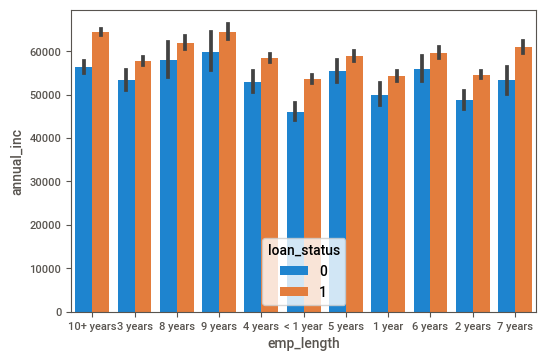

In [80]:
sns.barplot(x = data['emp_length'], y = data.annual_inc, hue = data.loan_status)

<AxesSubplot:xlabel='issue_year', ylabel='loan_amnt'>

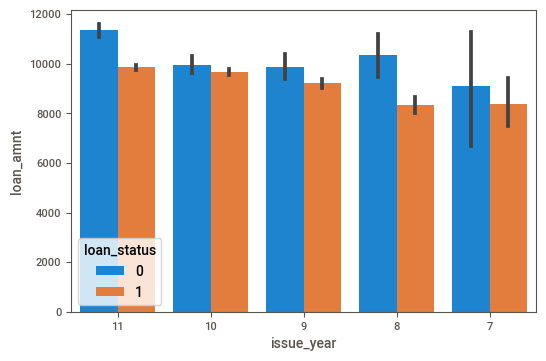

In [81]:
sns.barplot(x = data['issue_year'], y = data.loan_amnt, hue = data.loan_status)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'small_business'),
  Text(2, 0, 'other'),
  Text(3, 0, 'wedding'),
  Text(4, 0, 'debt_consolidation'),
  Text(5, 0, 'car'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'major_purchase'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

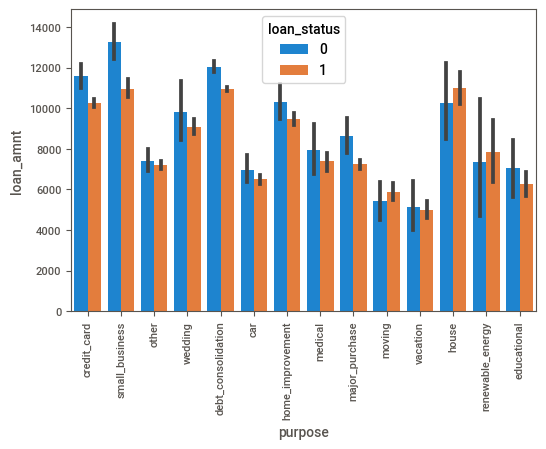

In [82]:
sns.barplot(x = data['purpose'], y = data.loan_amnt, hue = data.loan_status)
plt.xticks(rotation = 90)

### Analysis with Crosstab

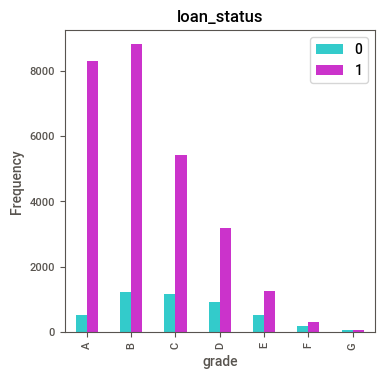

In [83]:
pot = pd.crosstab(data['grade'],data.loan_status )
pot.plot(kind="bar", color ="cmyk", alpha = 0.8,figsize=(4,4)) 
plt.title('loan_status')
plt.ylabel('Frequency')
plt.legend(['0', '1'])
plt.show()

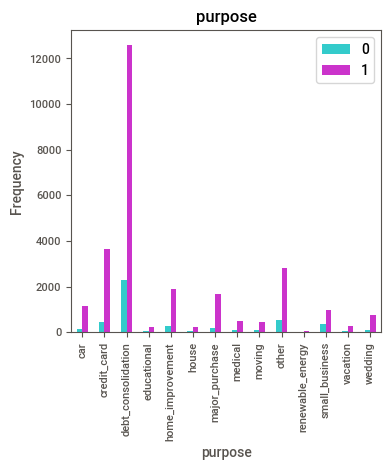

In [84]:
pot = pd.crosstab(data['purpose'],data.loan_status )
pot.plot(kind="bar", color ="cmyk", alpha = 0.8,figsize=(4,4)) 
plt.title('purpose')
plt.ylabel('Frequency')
plt.legend(['0', '1'])
plt.show()

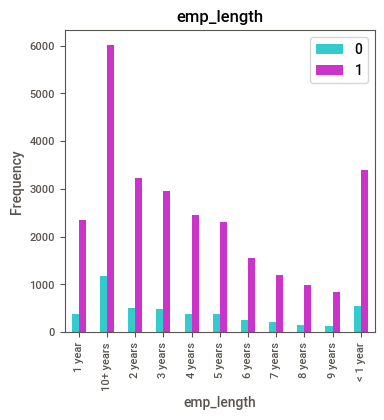

In [85]:
pot = pd.crosstab(data['emp_length'],data.loan_status )
pot.plot(kind="bar", color ="cmyk", alpha = 0.8,figsize=(4,4)) 
plt.title('emp_length')
plt.ylabel('Frequency')
plt.legend(['0', '1'])
plt.show()

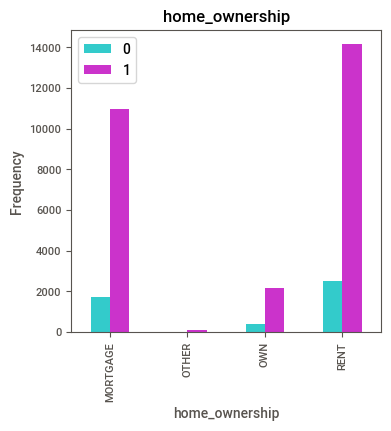

In [86]:
pot = pd.crosstab(data['home_ownership'],data.loan_status )
pot.plot(kind="bar", color ="cmyk", alpha = 0.8,figsize=(4,4)) 
plt.title('home_ownership')
plt.ylabel('Frequency')
plt.legend(['0', '1'])
plt.show()

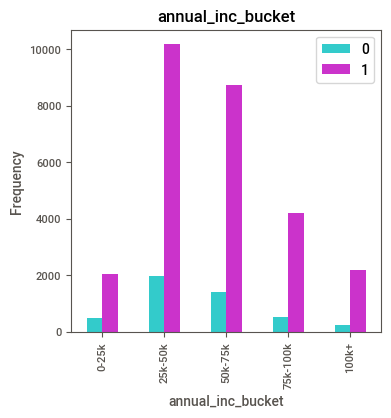

In [87]:
pot = pd.crosstab(data['annual_inc_bucket'],data.loan_status )
pot.plot(kind="bar", color ="cmyk", alpha = 0.8,figsize=(4,4)) 
plt.title('annual_inc_bucket')
plt.ylabel('Frequency')
plt.legend(['0', '1'])
plt.show()

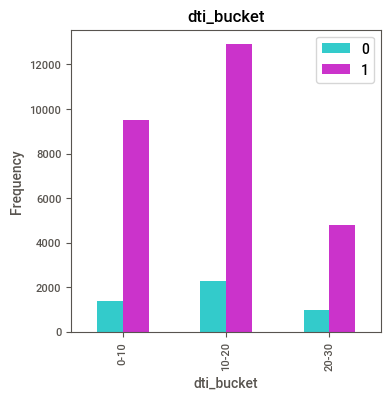

In [88]:
pot = pd.crosstab(data['dti_bucket'],data.loan_status )
pot.plot(kind="bar", color ="cmyk", alpha = 0.8,figsize=(4,4)) 
plt.title('dti_bucket')
plt.ylabel('Frequency')
plt.legend(['0', '1'])
plt.show()

### Bivariate analysis observations   
    *if the annual income is higher then peole tend to take bigger loans where the defaulters considerably higher
    *If interest rate and loan amount is higher then the defaulters are also higher.
    *For 60 months term the loan amount taken is higher, hence the defaulter is higher.
    *More no. of defaulters present in the year 2011
    *A and B grades have less defaulters as compare to others grade.
    *Max loan amount took fro small_business which leads to more defaulters.
    *People who took loan for debt_consolodation are higher rate of defaulters and the maximum people took loan from debt_consolidation as well.
    *People with less than 1 year of exp and who takes a loan have a grater chance to be in a defaulter range.
    *People who own a owned house tend to take lesser loan which leads to less defaulters.
    *People having 25k-50k salary took more loan which leads to more defaulters.
    *People who comes under 10-20 dti_bucket tend to take more loans which leads to more defaulters.

## From the univariate analysis the most imp. features which leads to loan defaulters are as follows:
    - Loan_amnt
    - int_rate
    - annual_inc
    - grade
    - emp_length
    - purpose
    - home_ownership

## Final Observation
    1. loan amount is directly proportional to defaulters
    2. Interst rate is directly proportional to defaulters
    3. For 60 months term the loan amount taken is higher, hence the defaulter is higher.
    4. As the year increasing people tend to take more loans (exponentially increasing)
    5. People with less than 1 year of exp and who takes a loan have a grater chance to be in a defaulter range.
    6. People who own a owned house tend to take lesser loan which leads to less defaulters.
    7. People having 25k-50k salary took more loan which leads to more defaulters.